In [1]:
import boto3
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'ryan-greiner-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be read from s3 bucket
file_key = 'CarPrice_Assignment.csv'
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading CSV file
price = pd.read_csv(file_content_stream)
price.head()

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
X = price[['wheelbase', 'enginesize', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]
Y = price['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

In [3]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# First Model

In [10]:
md1 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
      tf.keras.layers.Dense(1)
])

md1.compile(optimizer = 'adam', loss = 'mse')
history = md1.fit(X_train, Y_train, epochs = 100, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/100
2/2 [==============================] - 0s 95ms/step - loss: 250121040.0000 - val_loss: 198431488.0000
Epoch 2/100
2/2 [==============================] - 0s 27ms/step - loss: 250120512.0000 - val_loss: 198430976.0000
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 250119936.0000 - val_loss: 198430464.0000
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 250119360.0000 - val_loss: 198429952.0000
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 250118800.0000 - val_loss: 198429408.0000
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 250118240.0000 - val_loss: 198428912.0000
Epoch 7/100
2/2 [==============================] - 0s 17ms/step - loss: 250117696.0000 - val_loss: 198428416.0000
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 250117120.0000 - val_loss: 198427888.0000
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 250116592.0000 -

In [7]:
md1.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 1ms/step - loss: 198324752.0000


198324752.0

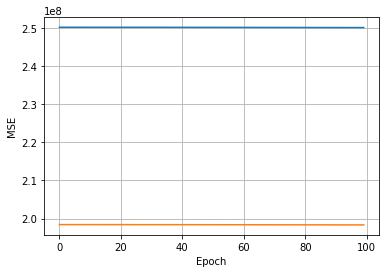

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid()
plt.show();

# Second Model

In [14]:
md2 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
      tf.keras.layers.Dense(8, activation = 'relu'),
      tf.keras.layers.Dense(1)
])

md2.compile(optimizer = 'adam', loss = 'mse')
history = md2.fit(X_train, Y_train, epochs = 100, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/100
2/2 [==============================] - 0s 49ms/step - loss: 250117088.0000 - val_loss: 198427824.0000
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 250116768.0000 - val_loss: 198427520.0000
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 250116416.0000 - val_loss: 198427200.0000
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 250116048.0000 - val_loss: 198426816.0000
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 250115696.0000 - val_loss: 198426480.0000
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 250115296.0000 - val_loss: 198426096.0000
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 250114896.0000 - val_loss: 198425728.0000
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 250114496.0000 - val_loss: 198425312.0000
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 250114048.0000 -

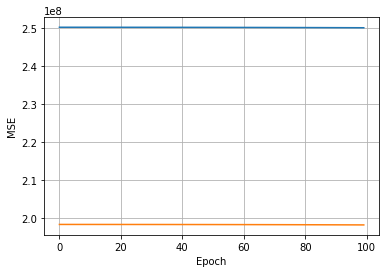

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid()
plt.show();

In [ ]:
md2.evaluate(X_test, Y_test)

In [ ]:
# The second model has a smaller 